# 파이토치로 XOR 문제를 다층 퍼셉트론으로 구현하기

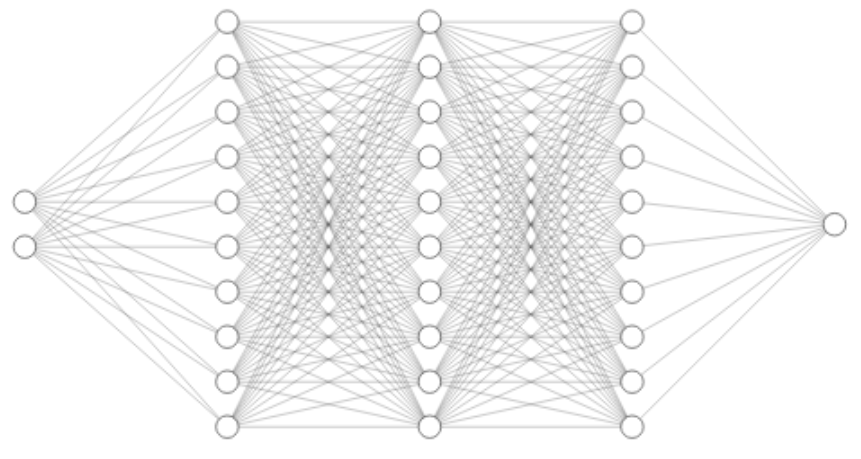

In [1]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
            nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
            nn.Sigmoid(),
            nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
            nn.Sigmoid(),
            nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
            nn.Sigmoid(),
            nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
            nn.Sigmoid()
        ).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

for epoch in range(10001):
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220889091492
1900 0.6931197047233582
2000 0.6931172609329224
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084990501404
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930763721466064
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930410861968994
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951906204224
3800 0.6929728984832764
3900 0.6929452419281006
4000 0.6929103136062622
4100 0.6928649544715881
4200 

In [2]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1176888e-04]
 [9.9982870e-01]
 [9.9984217e-01]
 [1.8543568e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0
